<a href="https://colab.research.google.com/github/cebisilerhmchunu-max/OIBSIP/blob/main/Predicting_House_Prices_with_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Housing.xls')

# Display basic information
print("Dataset Shape:", df.shape)
print("First 5 rows:")
print(df.head())
print("Dataset Info:")
print(df.info())
print("Summary Statistics:")
print(df.describe())
print("Missing Values:")
print(df.isnull().sum())

Dataset Shape: (545, 13)

First 5 rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeI

In [ ]:
# Missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Categorical variables to numerical
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'prefarea', 'furnishingstatus']

df_processed = df.copy()

# Binary encoding for yes/no columns
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
               'airconditioning', 'prefarea']
for col in binary_cols:
    df_processed[col] = df_processed[col].map({'yes': 1, 'no': 0})

df_processed = pd.get_dummies(df_processed, columns=['furnishingstatus'], drop_first=True)

print("\nProcessed Data Shape:", df_processed.shape)
print("\nProcessed Data Columns:", df_processed.columns.tolist())

Missing values in each column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Processed Data Shape: (545, 14)

Processed Data Columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']


In [ ]:
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle('Feature Distributions and Relationships with Price', fontsize=16, y=1.02)

# Distribution of target variable
axes[0, 0].hist(df['price'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of House Prices')
axes[0, 0].axvline(df['price'].mean(), color='red', linestyle='--', label=f'Mean: {df["price"].mean():,.0f}')
axes[0, 0].legend()

# Scatter plots for numerical features
features_to_plot = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for i, feature in enumerate(features_to_plot[:4]):
    row = (i + 1) // 4
    col = (i + 1) % 4
    axes[row, col].scatter(df[feature], df['price'], alpha=0.6)
    axes[row, col].set_xlabel(feature.capitalize())
    axes[row, col].set_ylabel('Price')
    axes[row, col].set_title(f'Price vs {feature.capitalize()}')

    # Add trend line
    z = np.polyfit(df[feature], df['price'], 1)
    p = np.poly1d(z)
    axes[row, col].plot(df[feature], p(df[feature]), "r--", alpha=0.8)

# Correlation heatmap
correlation_matrix = df_processed.corr()
axes[2, 0].axis('off')  # Remove empty subplot

# Create heatmap in a separate subplot
ax_heatmap = axes[2, 1]
im = ax_heatmap.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
ax_heatmap.set_title('Feature Correlation Heatmap')
plt.colorbar(im, ax=ax_heatmap)

# Price distribution by categorical features
categorical_features = ['airconditioning', 'prefarea', 'mainroad']
for i, feature in enumerate(categorical_features):
    ax = axes[2, i+2]
    df.groupby(feature)['price'].mean().plot(kind='bar', ax=ax, color=['skyblue', 'salmon'])
    ax.set_title(f'Average Price by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Average Price')
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# Correlation with price
print("\nCorrelation with Price:")
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)
print(correlation_with_price)

NameError: name 'plt' is not defined

In [ ]:
#
# '     to high correlation with price
selected_features = ['area', 'bathrooms', 'stories', 'airconditioning',
                     'parking', 'prefarea', 'bedrooms', 'mainroad']

print("Selected Features:", selected_features)

# Prepare features and target
X = df_processed[selected_features]
y = df_processed['price']

# Feature scaling (important for interpreting coefficients)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Selected Features: ['area', 'bathrooms', 'stories', 'airconditioning', 'parking', 'prefarea', 'bedrooms', 'mainroad']


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (436, 8)
Testing set size: (109, 8)


In [ ]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients
print("Model Coefficients:")
for feature, coef in zip(selected_features, model.coef_):
    print(f"{feature:20} : {coef:10.2f}")
print(f"\nIntercept: {model.intercept_:.2f}")

Model Coefficients:
area                 :  514389.95
bathrooms            :  593356.03
stories              :  308161.08
airconditioning      :  388681.82
parking              :  217403.07
prefarea             :  317594.94
bedrooms             :   93098.06
mainroad             :  153858.72

Intercept: 4748625.09


In [ ]:
# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Model Performance Metrics:")
print("=" * 50)
print(f"Training MSE:  {train_mse:,.2f}")
print(f"Testing MSE:   {test_mse:,.2f}")
print(f"Training R²:   {train_r2:.4f}")
print(f"Testing R²:    {test_r2:.4f}")
print("=" * 50)

# Root Mean Squared Error (more interpretable)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print(f"\nTraining RMSE: {train_rmse:,.2f}")
print(f"Testing RMSE:  {test_rmse:,.2f}")

Model Performance Metrics:
Training MSE:  1,076,867,208,513.22
Testing MSE:   1,907,485,961,246.58
Training R²:   0.6508
Testing R²:    0.6226

Training RMSE: 1,037,722.12
Testing RMSE:  1,381,117.65


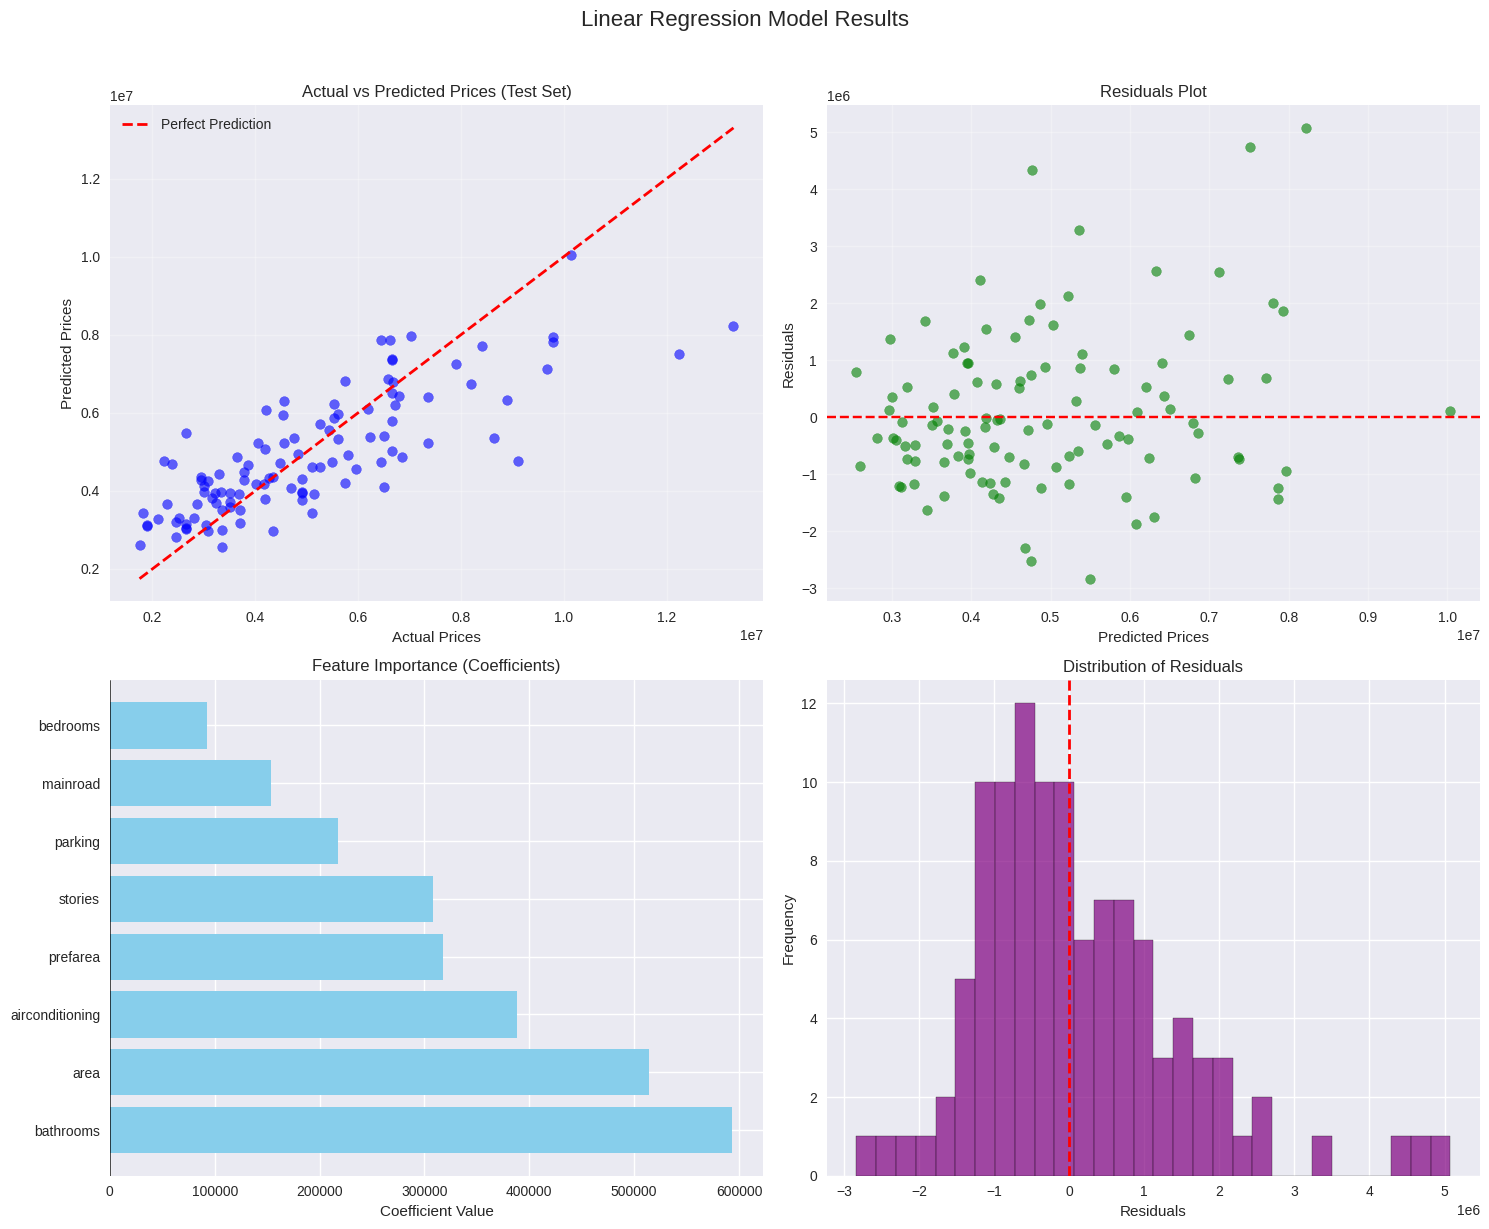

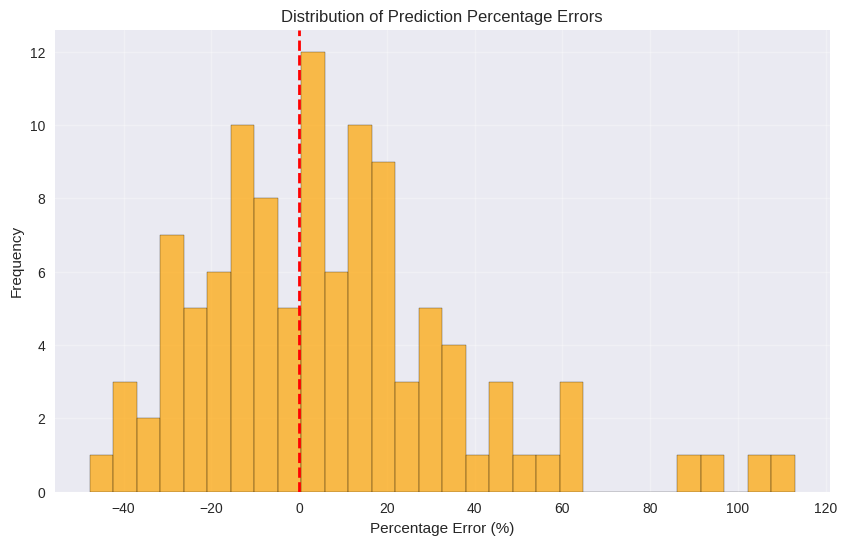

In [ ]:
# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Linear Regression Model Results', fontsize=16, y=1.02)

# 1. Actual vs Predicted (Test set)
axes[0, 0].scatter(y_test, y_pred_test, alpha=0.6, color='blue')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Prices')
axes[0, 0].set_ylabel('Predicted Prices')
axes[0, 0].set_title('Actual vs Predicted Prices (Test Set)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuals Plot
residuals = y_test - y_pred_test
axes[0, 1].scatter(y_pred_test, residuals, alpha=0.6, color='green')
axes[0, 1].axhline(y=0, color='red', linestyle='--')
axes[0, 1].set_xlabel('Predicted Prices')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residuals Plot')
axes[0, 1].grid(True, alpha=0.3)

# 3. Feature Importance (Coefficients)
coefficients = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model.coef_
}).sort_values('Coefficient', ascending=False)

axes[1, 0].barh(coefficients['Feature'], coefficients['Coefficient'], color='skyblue')
axes[1, 0].set_xlabel('Coefficient Value')
axes[1, 0].set_title('Feature Importance (Coefficients)')
axes[1, 0].axvline(x=0, color='black', linestyle='-', linewidth=0.5)

# 4. Distribution of Residuals
axes[1, 1].hist(residuals, bins=30, edgecolor='black', alpha=0.7, color='purple')
axes[1, 1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Residuals')

plt.tight_layout()
plt.show()

# Additional: Prediction error distribution
fig, ax = plt.subplots(figsize=(10, 6))
percentage_error = ((y_pred_test - y_test) / y_test) * 100
ax.hist(percentage_error, bins=30, edgecolor='black', alpha=0.7, color='orange')
ax.axvline(x=0, color='red', linestyle='--', linewidth=2)
ax.set_xlabel('Percentage Error (%)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Prediction Percentage Errors')
ax.grid(True, alpha=0.3)
plt.show()